In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import pandas as pd
import pylab as pl
import numpy as np

In [2]:
n_grid = 256
data = pd.read_csv(f'./data/tweb_cw_grid{n_grid}_rcellsize.csv').drop(['Unnamed: 0'], axis=1)
target = pd.read_csv('./data/stellar_sdss_phot.csv').drop(['Unnamed: 0'], axis=1)
tng_features = pd.read_csv('./data/tng_features.csv').drop(['Unnamed: 0'], axis=1)

df = pd.merge(data,target, on='ID')
df = pd.merge(df,tng_features, on='ID')
df

,ID,lambda1,lambda2,lambda3,delta,Environment,sdss_Mu,sdss_Mg,sdss_Mr,sdss_Mi,...,tng_MV,tng_MK,tng_Mg,tng_Mr,tng_Mi,tng_Mz,star_metallicity,veldisp,sfr,flag
0,16.0,-0.012398,1.152368,2.066389,4.777671,1.0,-17.908087,-19.562035,-20.320356,-20.702591,...,-20.548388,-23.370871,-20.210857,-20.856827,-21.182434,-21.419371,0.025193,148.564926,0.514805,1.0
1,23.0,-0.512016,0.602255,0.945626,0.025071,1.0,-18.359802,-20.107349,-20.888083,-21.279430,...,-20.822826,-23.853119,-20.392387,-21.172787,-21.544296,-21.816246,0.027339,126.692276,0.000000,1.0
2,33.0,-0.074309,1.097311,1.915701,2.447965,1.0,-18.453346,-20.105627,-20.840034,-21.210075,...,-20.825724,-23.725224,-20.429068,-21.157402,-21.501781,-21.746250,0.024973,100.522041,0.000000,1.0
3,34.0,-0.087317,0.961633,1.360917,2.354777,1.0,-18.690727,-19.624805,-20.013533,-20.268049,...,-20.401375,-22.727467,-20.288950,-20.591679,-20.778280,-20.927729,0.020130,83.370743,2.606434,1.0
4,36.0,-0.390293,0.355680,0.591379,-0.254494,1.0,-18.850306,-19.972075,-20.425173,-20.698471,...,-20.629223,-23.077963,-20.467035,-20.845730,-21.064079,-21.235315,0.019834,80.994431,1.344603,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8834,627848.0,-0.136897,0.191183,0.339062,-0.534059,1.0,-16.818243,-18.391932,-19.102192,-19.469898,...,-19.090384,-21.923309,-18.712364,-19.412504,-19.745045,-19.980099,0.016910,64.598961,0.015720,1.0
8835,630142.0,0.028533,0.339252,0.651122,0.491012,0.0,-17.007278,-18.627331,-19.358295,-19.734182,...,-19.366707,-22.221462,-18.977814,-19.694513,-20.034370,-20.273354,0.019973,60.592049,0.005721,1.0
8836,631897.0,-0.146916,0.222237,0.335085,-0.813624,1.0,-17.212696,-18.575975,-19.170778,-19.492334,...,-19.269835,-21.875492,-18.992546,-19.544336,-19.820772,-20.017145,0.017076,61.207840,0.226836,1.0
8837,640342.0,-0.253206,0.265831,0.428818,-0.534059,1.0,-16.983833,-18.609432,-19.334690,-19.701168,...,-19.270592,-22.139177,-18.875505,-19.601292,-19.943832,-20.184736,0.019614,60.833717,0.000000,1.0


In [3]:
df = df.dropna()
df

,ID,lambda1,lambda2,lambda3,delta,Environment,sdss_Mu,sdss_Mg,sdss_Mr,sdss_Mi,...,tng_MV,tng_MK,tng_Mg,tng_Mr,tng_Mi,tng_Mz,star_metallicity,veldisp,sfr,flag
0,16.0,-0.012398,1.152368,2.066389,4.777671,1.0,-17.908087,-19.562035,-20.320356,-20.702591,...,-20.548388,-23.370871,-20.210857,-20.856827,-21.182434,-21.419371,0.025193,148.564926,0.514805,1.0
1,23.0,-0.512016,0.602255,0.945626,0.025071,1.0,-18.359802,-20.107349,-20.888083,-21.279430,...,-20.822826,-23.853119,-20.392387,-21.172787,-21.544296,-21.816246,0.027339,126.692276,0.000000,1.0
2,33.0,-0.074309,1.097311,1.915701,2.447965,1.0,-18.453346,-20.105627,-20.840034,-21.210075,...,-20.825724,-23.725224,-20.429068,-21.157402,-21.501781,-21.746250,0.024973,100.522041,0.000000,1.0
3,34.0,-0.087317,0.961633,1.360917,2.354777,1.0,-18.690727,-19.624805,-20.013533,-20.268049,...,-20.401375,-22.727467,-20.288950,-20.591679,-20.778280,-20.927729,0.020130,83.370743,2.606434,1.0
4,36.0,-0.390293,0.355680,0.591379,-0.254494,1.0,-18.850306,-19.972075,-20.425173,-20.698471,...,-20.629223,-23.077963,-20.467035,-20.845730,-21.064079,-21.235315,0.019834,80.994431,1.344603,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8834,627848.0,-0.136897,0.191183,0.339062,-0.534059,1.0,-16.818243,-18.391932,-19.102192,-19.469898,...,-19.090384,-21.923309,-18.712364,-19.412504,-19.745045,-19.980099,0.016910,64.598961,0.015720,1.0
8835,630142.0,0.028533,0.339252,0.651122,0.491012,0.0,-17.007278,-18.627331,-19.358295,-19.734182,...,-19.366707,-22.221462,-18.977814,-19.694513,-20.034370,-20.273354,0.019973,60.592049,0.005721,1.0
8836,631897.0,-0.146916,0.222237,0.335085,-0.813624,1.0,-17.212696,-18.575975,-19.170778,-19.492334,...,-19.269835,-21.875492,-18.992546,-19.544336,-19.820772,-20.017145,0.017076,61.207840,0.226836,1.0
8837,640342.0,-0.253206,0.265831,0.428818,-0.534059,1.0,-16.983833,-18.609432,-19.334690,-19.701168,...,-19.270592,-22.139177,-18.875505,-19.601292,-19.943832,-20.184736,0.019614,60.833717,0.000000,1.0


In [4]:
df.keys()

Index(['ID', 'lambda1', 'lambda2', 'lambda3', 'delta', 'Environment',
       'sdss_Mu', 'sdss_Mg', 'sdss_Mr', 'sdss_Mi', 'sdss_Mz', 'galaxy_class',
       'pos_x', 'pos_y', 'pos_z', 'vel_x', 'vel_y', 'vel_z', 'spin_x',
       'spin_y', 'spin_z', 'tng_MU', 'tng_MB', 'tng_MV', 'tng_MK', 'tng_Mg',
       'tng_Mr', 'tng_Mi', 'tng_Mz', 'star_metallicity', 'veldisp', 'sfr',
       'flag'],
      dtype='object')

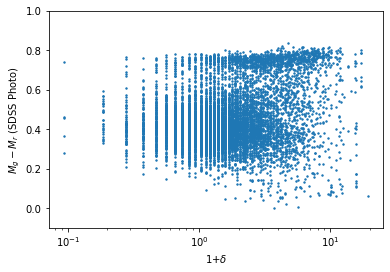

In [5]:
pl.scatter(1+df['delta'], df['sdss_Mg']-df['sdss_Mr'], s=2)
pl.xlabel(r'1+$\delta$')
pl.ylabel(r'$M_g-M_r$ (SDSS Photo)')
pl.xscale('log')
pl.ylim(-0.1,1)
pl.show()

In [6]:
predictors = ['delta','lambda1','lambda2','lambda3']
Y = df['galaxy_class']
X = df[predictors]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

6187 2652


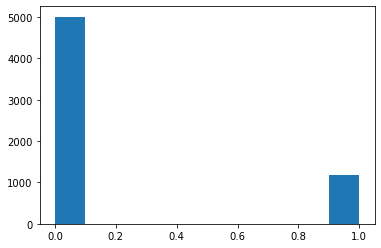

In [8]:
_ = pl.hist(Y_train)
print(len(Y_train), len(Y_test))

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2))
mlp.fit(X_train, Y_train)
print( f' f1_score:{f1_score(Y_test,mlp.predict(X_test))},  Acc:{accuracy_score(Y_test,mlp.predict(X_test))}')

 f1_score:0.43606998654104984,  Acc:0.8420060331825038


In [10]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, Y_train)
print( f' f1_score:{f1_score(Y_test,dtc.predict(X_test))},  Acc:{accuracy_score(Y_test,dtc.predict(X_test))}')

 f1_score:0.42,  Acc:0.8250377073906485


In [11]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, Y_train)
print( f' f1_score:{f1_score(Y_test,rfc.predict(X_test))},  Acc:{accuracy_score(Y_test,rfc.predict(X_test))}')

 f1_score:0.45231607629427795,  Acc:0.8484162895927602


In [12]:
svc = svm.SVC()
svc.fit(X_train, Y_train)
print( f' f1_score:{f1_score(Y_test,svc.predict(X_test))},  Acc:{accuracy_score(Y_test,svc.predict(X_test))}')

 f1_score:0.3994126284875183,  Acc:0.8457767722473605


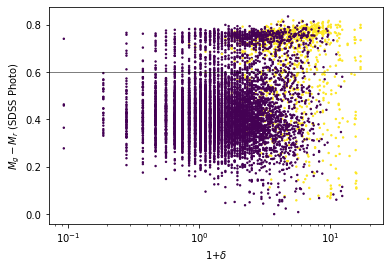

In [13]:
pl.scatter(1+df['delta'], df['sdss_Mg']-df['sdss_Mr'], s=2, c=mlp.predict(X))
pl.xlabel(r'1+$\delta$')
pl.ylabel(r'$M_g-M_r$ (SDSS Photo)')
pl.xscale('log')
pl.axhline(0.6, c='k', lw=0.5)
pl.show()

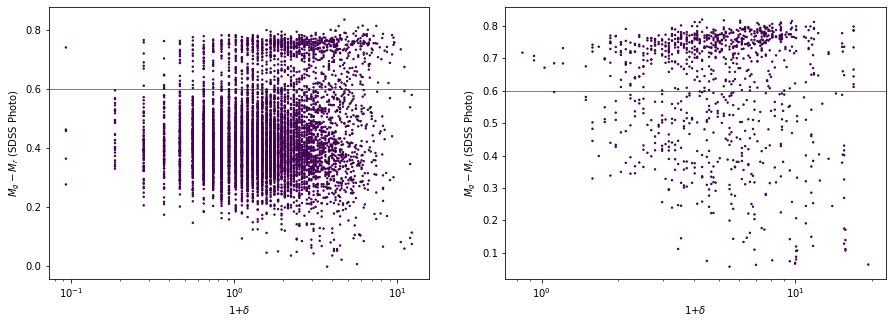

In [14]:
pred = mlp.predict(X)
ii_0 = pred == 0
ii_1 = pred == 1

fig = pl.figure(figsize=(15,5))
pl.subplot(1,2,1)
pl.scatter(1+df['delta'][ii_0], df['sdss_Mg'][ii_0]-df['sdss_Mr'][ii_0], s=2, c=pred[ii_0])
pl.xlabel(r'1+$\delta$')
pl.ylabel(r'$M_g-M_r$ (SDSS Photo)')
pl.xscale('log')
pl.axhline(0.6, c='k', lw=0.5)

pl.subplot(1,2,2)
pl.scatter(1+df['delta'][ii_1], df['sdss_Mg'][ii_1]-df['sdss_Mr'][ii_1], s=2, c=pred[ii_1])
pl.xlabel(r'1+$\delta$')
pl.ylabel(r'$M_g-M_r$ (SDSS Photo)')
pl.xscale('log')
pl.axhline(0.6, c='k', lw=0.5)

pl.show()

In [15]:
Y_pred_random = np.random.uniform(size=len(X_test))<0.5
Y_pred_random
print( f' f1_score:{f1_score(Y_test,Y_pred_random)},  Acc:{accuracy_score(Y_test,Y_pred_random)}')

 f1_score:0.2548910005589715,  Acc:0.4973604826546003


<Figure size 576x576 with 0 Axes>

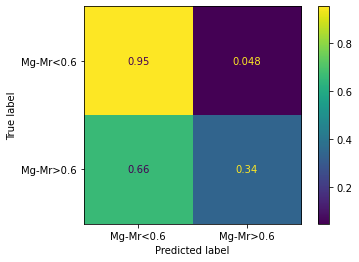

In [16]:
fig = pl.figure(figsize=(8,8))
cm = confusion_matrix(Y_test, mlp.predict(X_test), labels=mlp.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mg-Mr<0.6','Mg-Mr>0.6'])
disp.plot()
pl.show()

 f1_score:0.9276595744680851,  Acc:0.9743589743589743


/global/common/software/desi/cori/desiconda/20211217-2.0.0/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 576x576 with 0 Axes>

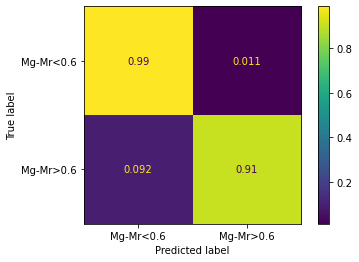

In [17]:
predictors = ['delta','lambda1','lambda2','lambda3','star_metallicity','sfr','veldisp']
Y = df['galaxy_class']
X = df[predictors]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes=(2,2))
mlp.fit(X_train, Y_train)
print( f' f1_score:{f1_score(Y_test,mlp.predict(X_test))},  Acc:{accuracy_score(Y_test,mlp.predict(X_test))}')
fig = pl.figure(figsize=(8,8))
cm = confusion_matrix(Y_test, mlp.predict(X_test), labels=mlp.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mg-Mr<0.6','Mg-Mr>0.6'])
disp.plot()
pl.show()

 f1_score:0.0,  Acc:0.8201357466063348


<Figure size 576x576 with 0 Axes>

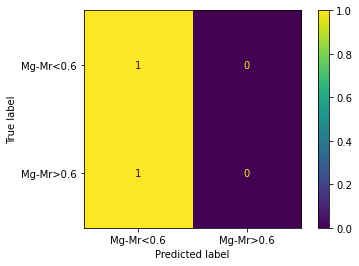

In [18]:
predictors = ['delta','lambda1','lambda2','lambda3','veldisp']
Y = df['galaxy_class']
X = df[predictors]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes=(2,2))
mlp.fit(X_train, Y_train)
print( f' f1_score:{f1_score(Y_test,mlp.predict(X_test))},  Acc:{accuracy_score(Y_test,mlp.predict(X_test))}')
fig = pl.figure(figsize=(8,8))
cm = confusion_matrix(Y_test, mlp.predict(X_test), labels=mlp.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mg-Mr<0.6','Mg-Mr>0.6'])
disp.plot()
pl.show()

 f1_score:0.0,  Acc:0.8163650075414781


<Figure size 576x576 with 0 Axes>

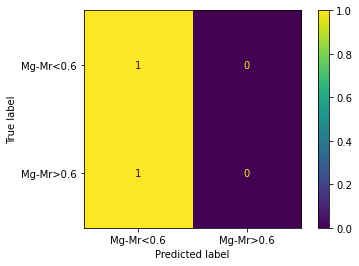

In [19]:
predictors = ['delta']
Y = df['galaxy_class']
X = df[predictors]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes=(2,2))
mlp.fit(X_train, Y_train)
print( f' f1_score:{f1_score(Y_test,mlp.predict(X_test))},  Acc:{accuracy_score(Y_test,mlp.predict(X_test))}')
fig = pl.figure(figsize=(8,8))
cm = confusion_matrix(Y_test, mlp.predict(X_test), labels=mlp.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mg-Mr<0.6','Mg-Mr>0.6'])
disp.plot()
pl.show()

 f1_score:0.0,  Acc:0.8163650075414781


<Figure size 576x576 with 0 Axes>

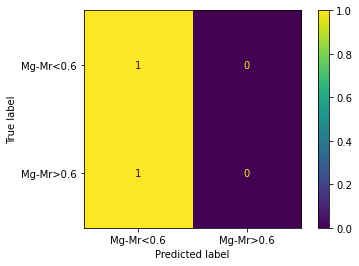

In [20]:
predictors = ['delta']
Y = df['galaxy_class']
X = df[predictors]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes=(1))
mlp.fit(X_train, Y_train)
print( f' f1_score:{f1_score(Y_test,mlp.predict(X_test))},  Acc:{accuracy_score(Y_test,mlp.predict(X_test))}')
fig = pl.figure(figsize=(8,8))
cm = confusion_matrix(Y_test, mlp.predict(X_test), labels=mlp.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mg-Mr<0.6','Mg-Mr>0.6'])
disp.plot()
pl.show()

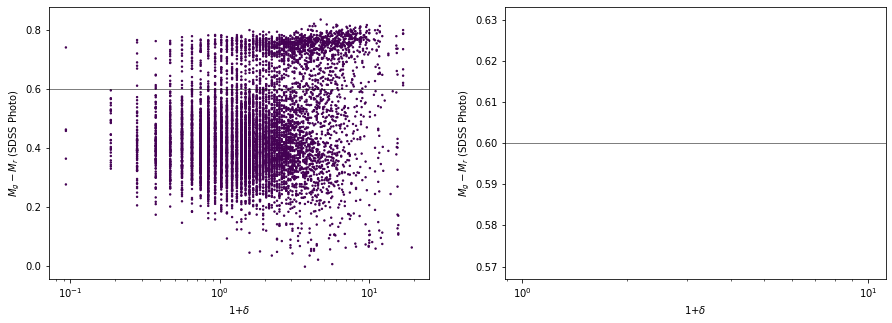

In [21]:
pred = mlp.predict(X)
ii_0 = pred == 0
ii_1 = pred == 1

fig = pl.figure(figsize=(15,5))
pl.subplot(1,2,1)
pl.scatter(1+df['delta'][ii_0], df['sdss_Mg'][ii_0]-df['sdss_Mr'][ii_0], s=2, c=pred[ii_0])
pl.xlabel(r'1+$\delta$')
pl.ylabel(r'$M_g-M_r$ (SDSS Photo)')
pl.xscale('log')
pl.axhline(0.6, c='k', lw=0.5)

pl.subplot(1,2,2)
pl.scatter(1+df['delta'][ii_1], df['sdss_Mg'][ii_1]-df['sdss_Mr'][ii_1], s=2, c=pred[ii_1])
pl.xlabel(r'1+$\delta$')
pl.ylabel(r'$M_g-M_r$ (SDSS Photo)')
pl.xscale('log')
pl.axhline(0.6, c='k', lw=0.5)

pl.show()